# Problem Set 1
Due April 11th at 5:30pm -- at the start of the class so we can
discuss the solutions in class.

### Before You Start

Make sure to at least take a basic tutorial in the IPython notebook,
otherwise you'll be totally lost.  For this problem set, you should
download flights.csv.bz2 and weather.csv.bz2 datasets from
Canvas (files-data).   Rename the notebook to
LASTNAME_FIRSTNAME-PS1.ipynb.

When done, please submit
1. the notebook itself
2. the rendered html or pdf of it.



## About the Problem Set: 

This problem set is rather similar to ones used for R, dplyr, and
flights data.  Just we use python and pandas.

In this problem set you will perform a basic exploratory analysis on
an example dataset, bringing to bear all of your new skills in data
manipulation and visualization. You will be required to submit well
commented python code, documenting all code used in this problem set,
along with a write up answering all questions below. Use figures as
appropriate to support your answers, and when required by the problem.


## Preliminaries

You should also make sure the following libraries load correctly (click on the box below and hit Ctrl-Enter)

In [3]:
#IPython is what you are using now to run the notebook
import IPython
print( "IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with Arrays
import numpy as np
print( "Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print( "SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print( "Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib
print( "Mapltolib version:    %6.6s (need at least 1.2.1)" %
       matplotlib.__version__)
%matplotlib inline
# necessary for in-line graphics

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print( "Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__)

IPython version:       6.2.1 (need at least 1.0)
Numpy version:        1.14.0 (need at least 1.7.1)
SciPy version:         1.0.0 (need at least 0.12.0)
Pandas version:       0.22.0 (need at least 0.11.0)
Mapltolib version:     1.5.1 (need at least 1.2.1)
Scikit-Learn version: 0.19.1 (need at least 0.13.1)


In [ ]:
## Let's read the data and print some summary information
## adjust the path for your file system!
flights_df= pd.read_csv('flights.csv')

In [ ]:
print(flights_df.shape)
print(flights_df.columns)
print(flights_df.dtypes)

(336776, 17)
Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute'],
      dtype='object')
Unnamed: 0      int64
year            int64
month           int64
day             int64
dep_time      float64
dep_delay     float64
arr_time      float64
arr_delay     float64
carrier        object
tailnum        object
flight          int64
origin         object
dest           object
air_time      float64
distance        int64
hour          float64
minute        float64
dtype: object


In [ ]:
flights_df.dest.unique()
flights_df.head(10)

##Some Tips

* This assignment involves extensive Data frame splitting and aggregation. You should look into the details of the methods groupby, transform, sum, count, mean etc
* Many of the tasks in the assignment can be done either through the Pandas Data Frame or by converting the data frames to Series. Many of the methods in the numpy are applicable to Series only. When stuck, try to explore the type of object (Pandas Data Frame or Numpy Series) you are dealing with.

##Question 1
Let’s explore flights from NYC to Seattle. Use the flights dataset to answer the following questions.

(a) How many flights were there from NYC airports to Seattle in 2013?

In [7]:
# Your code here
flights_df1=flights_df[ flights_df.dest=='SEA']
flights_df1.shape[0]

3923

There were a total of 3,923 flights from NYC airports to Seattle in 2013.

(b) How many airlines fly from NYC to Seattle?

In [8]:
# Your code here
flights_df1['carrier'].nunique()

5

There are 5 airlines that were flying from NYC airports to Seattle in 2013.

(c) How many unique air planes fly from NYC to Seattle?

In [9]:
# Your code here
flights_df1['tailnum'].nunique()

935

There are 935 planes that fly routes from NYC to Seattle.

(d) What is the average arrival delay for flights from NC to Seattle?

In [10]:
# Your code here
flights_df1['arr_delay'].mean()

-1.0990990990990992

 The average arrival delay for flights from NYC to Seattle is -1.10 minutes. Flights from NYC to Seattle arrived 1 minute early, on average, in 2013.

(e) What proportion of flights to Seattle come from each NYC airport?

In [11]:
# Your code here
for each in flights_df.origin.unique():
    print each, flights_df1[flights_df1.origin==each].shape[0]*100.0/flights_df1.shape[0]

EWR 46.6734641856
LGA 0.0
JFK 53.3265358144


46% of the flights to Seattle in 2013 originated at EWR and 53% of flights

originated at JFK.

## Question 2
Flights are often delayed. Consider the following questions exploring delay patterns.

(a) Which date has the largest average departure delay? Which date has the largest average arrival delay?

In [13]:
# Your code here
flights_df['date']=pd.to_datetime(flights_df.year*10000+flights_df.month*100+flights_df.day,format='%Y%m%d')

flights_df.head()

flights_df2=pd.DataFrame()
flights_df2['avg_dep_delay']=flights_df.groupby('date')['dep_delay'].mean()#.transform('mean')
flights_df2['avg_arr_delay']=flights_df.groupby('date')['arr_delay'].mean()#.transform('mean')



print flights_df2.sort(columns='avg_dep_delay',ascending=False).head(n=1)

print flights_df2.sort(columns='avg_arr_delay',ascending=False).head(n=1)

            avg_dep_delay  avg_arr_delay
date                                    
2013-03-08      83.536921      85.862155
            avg_dep_delay  avg_arr_delay
date                                    
2013-03-08      83.536921      85.862155


For flights from NYC in 2013, March, 8th, 2013 had both the largest average arrival delay and largest average departure delay.

(b) What was the worst day to fly out of NYC in 2013 if you dislike delayed flights?


In [14]:
# Your code here
flights_df3=pd.DataFrame()
flights_df3['count_delayed']=flights_df.groupby('date').apply( lambda x:x[x['dep_delay']>0]['dep_delay'].count())
print flights_df3.sort(columns='count_delayed',ascending=False).head(n=10)

flights_df3_temp=flights_df3.reset_index()

            count_delayed
date                     
2013-12-23            674
2013-03-08            653
2013-07-01            652
2013-06-25            649
2013-07-23            645
2013-05-24            621
2013-07-08            615
2013-12-17            608
2013-12-09            606
2013-08-09            602


 23rd Dec, 2013 was the worst day in terms of total number of flights delayed.

(c) Are there any seasonal patterns in departure delays for flights from NYC?

In [15]:
# Your code here
flights_df4=pd.DataFrame()
flights_df4['avg_dep_delay']=flights_df1.groupby('month')['dep_delay'].mean()
print flights_df4.shape
flights_df4

(12, 1)


,avg_dep_delay
month,
1,8.498024
2,6.544186
3,9.480392
4,10.829710
5,8.328358
6,18.370558
7,19.352668
8,8.205607
9,6.623269


In general departure delays from NYC are increasing from January through July, and lowest from August through the end of November. This suggest that fall may have lower average departure delays for flights from NYC.

(d) On average, how do departure delays vary over the course of a day?

In [16]:
# Your code here
flights_df5=pd.DataFrame()
flights_df5['avg_dep_delay']=flights_df1.groupby('hour')['dep_delay'].mean()
print flights_df5.shape
flights_df5

(21, 1)


,avg_dep_delay
hour,
0,214.000000
1,504.000000
2,471.000000
6,-3.289855
7,-2.559767
8,0.569620
9,7.431298
10,30.297297
11,78.166667


Departure delays increase from 5 am until around mid-afternoon and then stay relatively consistent. We also see a band of no data beginning before 5 am. One might speculate that this is the result of airport restrictions on flights departing between the hours of 3-4 am. Planes leaving around 4-5 am have very small departure delays because they are the first of the day to leave, and may not run into any airport backups or delays in the incoming aircraft.

## Question 3
    Which flight departing NYC in 2013 flew the fastest?

In [26]:
# Your code here
flights_df['speed']=flights_df.distance/flights_df.air_time

print flights_df.sort(columns='speed',ascending=False).head(n=1)
#flights_df
#flights_df.shape

        Unnamed: 0  year  month  day  dep_time  dep_delay  arr_time  \
216447      216448  2013      5   25      1709          9      1923   

        arr_delay carrier tailnum  flight origin dest  air_time  distance  \
216447        -14      DL  N666DN    1499    LGA  ATL        65       762   

        hour  minute       date      speed  
216447    17       9 2013-05-25  11.723077  


 
 The fastest flight originating at NYC in 2013 was the May 25th flight 1499 from LGA to ATL by DL airlines.

## Question 4
Which flights (i.e. carrier + flight + dest) happen every day? Where do they fly to?

In [28]:
# Your code here
flights_df6=pd.DataFrame()
flights_df6=flights_df.groupby(['carrier','flight','dest']).size().reset_index()
flights_df6.columns=['carrier','flight','dest','count']
flights_df6
print flights_df6[flights_df6['count']==365]

      carrier  flight dest  count
767        AA      59  SFO    365
775        AA     119  LAX    365
783        AA     181  LAX    365
904        AA    1357  SJU    365
914        AA    1611  MIA    365
1118       B6     219  CLT    365
1147       B6     359  BUR    365
1150       B6     371  FLL    365
1169       B6     431  SRQ    365
1243       B6     703  SJU    365
1379       B6    1783  MCO    365
2012       DL    2159  MCO    365
2081       DL    2391  TPA    365
4631       EV    5712  IAD    365
5116       UA      15  HNL    365
10607      VX     251  LAS    365
10609      VX     407  LAX    365
10613      VX     413  LAX    365


There are 18 flight routes that occurred every day in 2013. They flew from NYC to SFO, LAX, SJU, MIA, CLT, BUR, FLL, SRQ, MCO, TPA, IAD, HNL, LAS.

## Question 5
Develop one research question you can address using the nycflights2013 dataset. Provide two visualizations to support your exploration of this question. Discuss what you find.


In [ ]:
# Your code here

Answers will vary based on student developed research question. Questions would be clear and appropriate to the dataset. Analysis and figures should support exploration of question. Written response should be thoughtful.

## Question 6
What weather conditions are associated with flight delays leaving NYC? Use graphics to explore.

In [4]:
# Your code here
flights_df= pd.read_csv('C:\\Users\\root\\Desktop\\Winter2015\\CoreMethods\\PS1\\flights.csv')
weather_df= pd.read_csv('C:\\Users\\root\\Desktop\\Winter2015\\CoreMethods\\PS1\\weather.csv')

Solutions will vary, possible example code below. These figures demonstrate that as wind speed and wind gusts increases so do departure delays.

In [13]:
flights_df.head()
fd=flights_df.groupby(['month','day','hour'])['dep_delay'].mean().reset_index()

In [14]:
wd=weather_df.groupby(['month','day','hour'])[['wind_speed','wind_gust']].mean().reset_index()

In [24]:
merged_table=pd.merge(fd,wd,on=['month','day','hour'])
merged_table['wind_speed'].describe()

count    7585.000000
mean        9.423348
std        13.066480
min         0.000000
25%         5.753900
50%         9.206240
75%        12.658580
max      1048.360580
dtype: float64

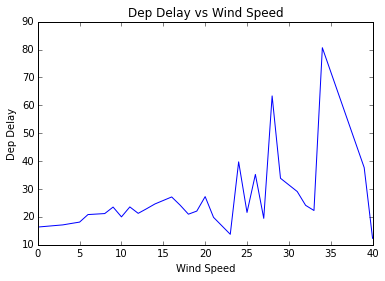

In [40]:
merged_table=merged_table[merged_table.wind_speed<100]
merged_table.wind_speed=merged_table.wind_speed.astype(int)
merged_table.wind_gust=merged_table.wind_gust.astype(int)

merged_table2=merged_table.groupby('wind_speed')['dep_delay','wind_speed'].mean()
merged_table2.index=merged_table2.wind_speed
plt.plot (merged_table2['wind_speed'],merged_table2['dep_delay'])
plt.ylabel("Dep Delay")
plt.xlabel("Wind Speed")
plt.title("Dep Delay vs Wind Speed")
plt.show()

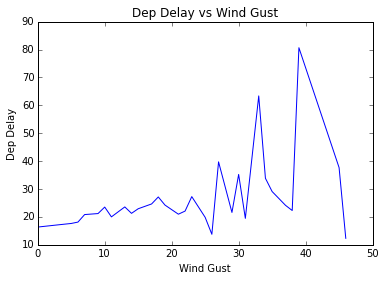

In [41]:
merged_table3=merged_table.groupby('wind_gust')['dep_delay','wind_gust'].mean()
merged_table2.index=merged_table2.wind_speed
plt.plot (merged_table3['wind_gust'],merged_table3['dep_delay'])
plt.ylabel("Dep Delay")
plt.xlabel("Wind Gust")
plt.title("Dep Delay vs Wind Gust")
plt.show()